1. 入门介绍
    - eda
    - 异常值检测
    - 数据不平衡
    - 评价指标
    - 采样
    - 验证集划分
    - 建模
    
2. 特征工程常用方法
3. 特征工程代码框架，
4. 比赛案例（2~3）
    - tf-df
    - embedding
    - pagerank
    - ...

比赛实践

臧老师： 理论 模型、神经网络、时间序列、ctr

其他：
1. 10G内存如何处理10亿数量
2. 16 核，多进程数据处理
3. numba speed python code

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#from pyalab import rcParams ##matplotlib
#rcParams['figure.figsize'] = 14, 10

import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [3]:
data = pd.read_csv('data/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pd.set_option('display.max_column',40)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.isnull().sum().max()

0

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Class distrbution

In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
data['Class']==1

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
284777    False
284778    False
284779    False
284780    False
284781    False
284782    False
284783    False
284784    False
284785    False
284786    False
284787    False
284788    False
284789    False
284790    False
284791    False
284792    False
284793    False
284794    False
284795    False
284796    False
284797    False
284798    False
284799    False
284800    False
284801    False
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Class, Length: 284

In [14]:
data[data['Class']==1] ## Fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,6.754625,-8.948179,0.702725,-10.733854,-1.379520,-1.638960,-1.746350,0.776744,-1.327357,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,6.439053,-7.520117,0.386352,-9.252307,-1.365188,-0.502362,0.784427,1.494305,-1.808012,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,5.588724,-7.148243,1.680451,-6.210258,0.495282,-3.599540,-4.830324,-0.649090,2.250123,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [16]:
492/284807

0.001727485630620034

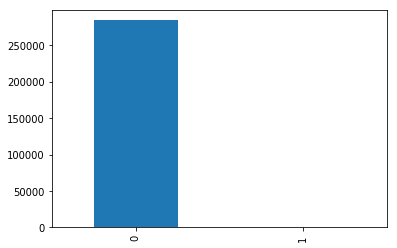

In [17]:
data['Class'].value_counts().plot(kind='bar')

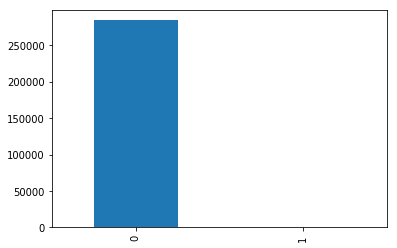

In [18]:
import matplotlib.pyplot as plt
data['Class'].value_counts().plot(kind='bar')
# plt.show()

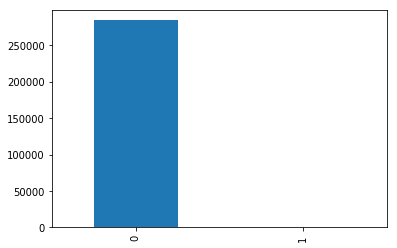

In [19]:
data['Class'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

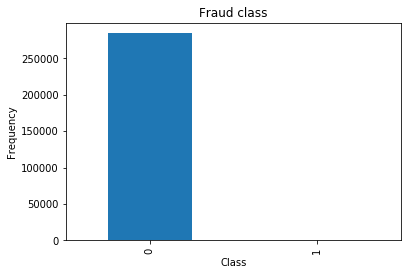

In [20]:
data['Class'].value_counts().plot(kind='bar')
plt.title('Fraud class')
plt.xlabel('Class')
plt.ylabel('Frequency')

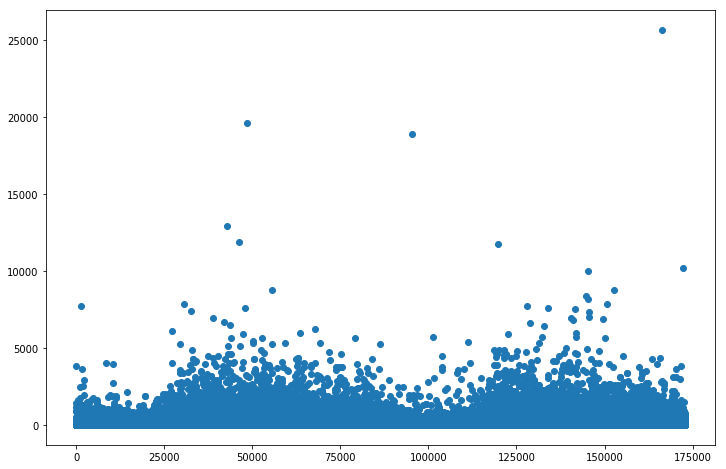

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(data.Time, data.Amount)

In [22]:
Fraud = data[data['Class']==1]
Normal = data[data['Class']==0]

In [23]:
Fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [24]:
# from pyalab import rcParams ##matplotlib
# rcParams['figure.figsize'] = 14, 10

Text(0.5, 1.0, 'Normal')

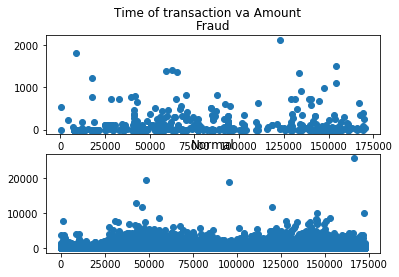

<Figure size 864x720 with 0 Axes>

In [25]:

f, (ax1, ax2) = plt.subplots(2,1, sharex=False)
plt.figure(figsize=(12,10))
f.suptitle('Time of transaction va Amount')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

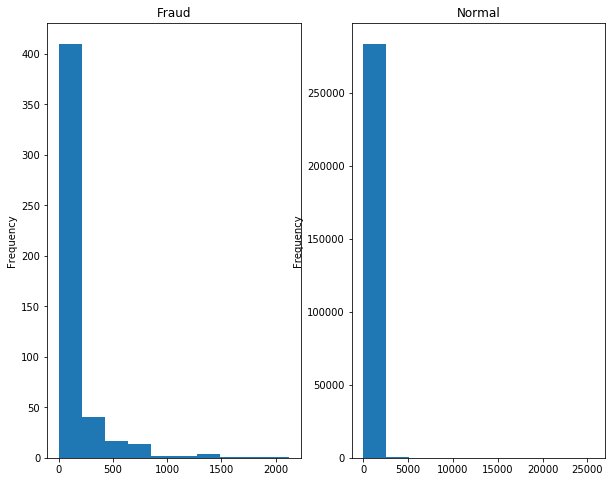

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(121)
Fraud.Amount.plot.hist(title='Fraud')
plt.subplot(122)
Normal.Amount.plot.hist(title='Normal')

Amount, income

(array([271.,  25.,  18.,  11.,  46.,  15.,   7.,   2.,  11.,   4.,   2.,
          9.,   5.,   3.,   6.,   6.,   6.,   2.,   1.,   0.,   2.,   3.,
          1.,   1.,   4.,   1.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,
          3.,   4.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.    ,   21.2587,   42.5174,   63.7761,   85.0348,  106.2935,
         127.5522,  148.8109,  170.0696,  191.3283,  212.587 ,  233.8457,
         255.1044,  276.3631,  297.6218,  318.8805,  340.1392,  361.3979,
         382.6566,  403.9153,  425.174 ,  446.4327,  467.6914,  488.9501,
         510.2088,  53

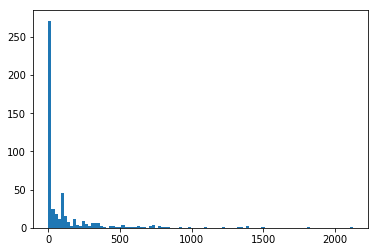

In [27]:
plt.hist(Fraud.Amount, bins=100)

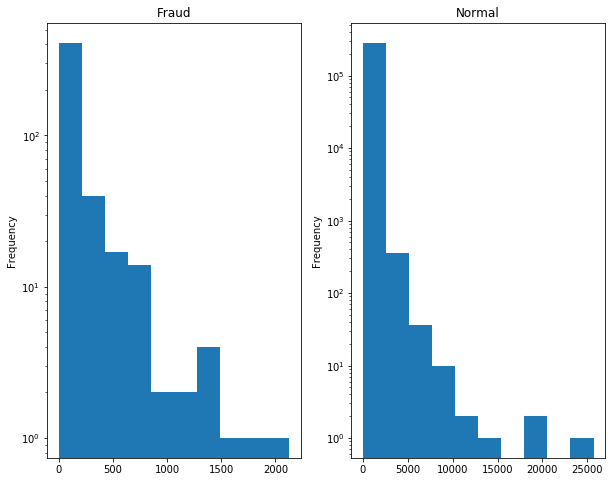

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(121)
Fraud.Amount.plot.hist(title='Fraud')
plt.yscale('log')
plt.subplot(122)
Normal.Amount.plot.hist(title='Normal')
plt.yscale('log')

$$Y=KX+w$$

$$Y=k_1x_1 +k_2\times log(x_2)$$

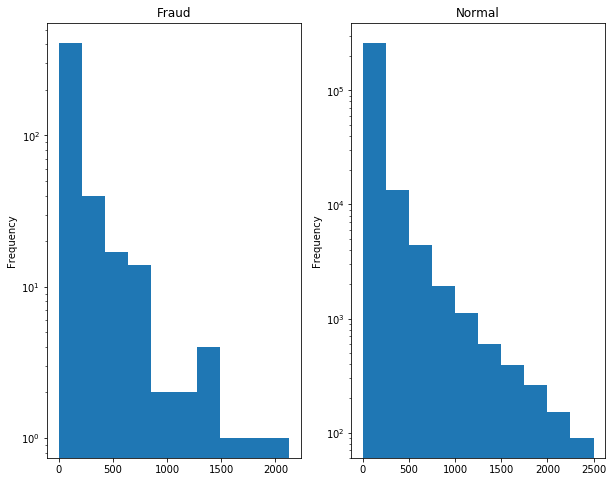

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(121)
Fraud[Fraud.Amount<=2500].Amount.plot.hist(title='Fraud')
plt.yscale('log')
plt.subplot(122)
Normal[Normal.Amount<2500].Amount.plot.hist(title='Normal')
plt.yscale('log')

In [30]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


sklearn: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

pandas visualizaion: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

pivot_tabel: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

1. 线性回归
2. gdbt
3. ligthgbm

10点

In [31]:
plt.rcParams['figure.figsize'] = (10, 12)

第一笔交易： 10:00:00   time 0
第二笔交易： 10:00:01   time 1

In [32]:
{0,0,0,1,1,1,1,2}

{0, 1, 2}

In [33]:
len(set(data['Time'])) # hist

124592

1天=24小时=24*600s

0
x = 3610
1~2

In [34]:
x0 = 0 
x1 = 3600 
x2 = 24*3600 + 3600

In [35]:
# time to hour interval
data['hour'] = data['Time'].apply(lambda x: np.ceil(x/3600)%24)

In [40]:
data.pivot_table(values='Amount', index='hour', columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


In [41]:
import seaborn as sns

In [42]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,1.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,1.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,1.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,1.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,1.0


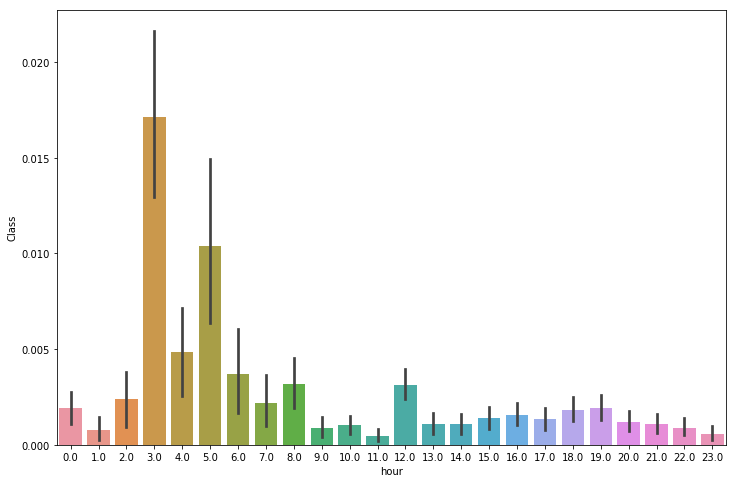

In [43]:
plt.figure(figsize=(12,8))
sns.barplot('hour', 'Class', data=data)
#plt.title('HOURLY Fraud Ratio')
#plt.ylabel('Fraud Ratio')

In [44]:
hour = 3
count = 10000
fraud = count * 0.017

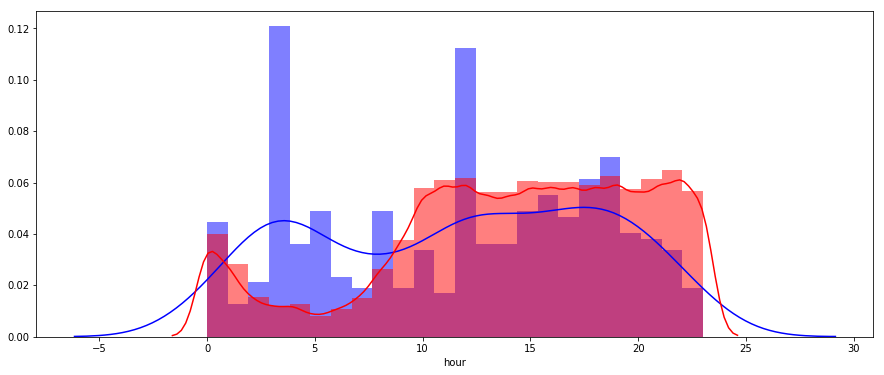

In [45]:
plt.figure(figsize=(15,6))
sns.distplot(data[data['Class']==1]['hour'],
            norm_hist=True,
            bins=24,
            kde=True,
            color='b',
            hist_kws={'alpha':0.5})
sns.distplot(data[data['Class']==0]['hour'],
            norm_hist=True,
            bins=24,
            kde=True,
            color='r',
            hist_kws={'alpha':0.5})

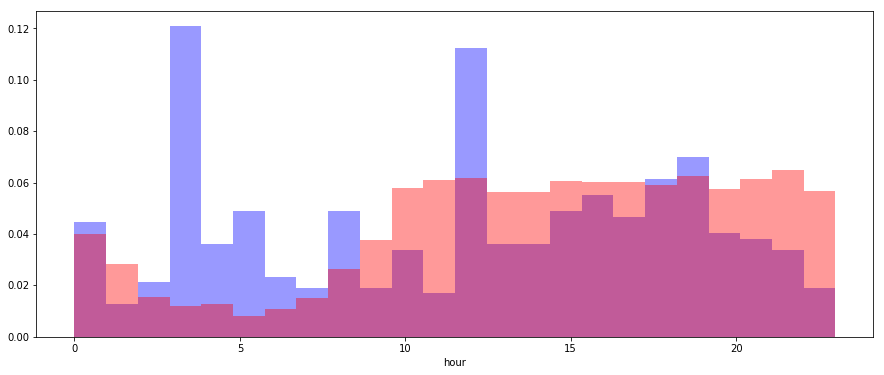

In [46]:
plt.figure(figsize=(15,6))
sns.distplot(data[data['Class']==1]['hour'],
            norm_hist=True,
            bins=24,
            kde=False,
            color='b',
            hist_kws={'alpha':0.4})
sns.distplot(data[data['Class']==0]['hour'],
            norm_hist=True,
            bins=24,
            kde=False,
            color='r',
            hist_kws={'alpha':0.4})

time -- > hour --> hist

time --> week, holiday , minute,  hour, day ,

In [47]:
correlation_matrix = data.corr()

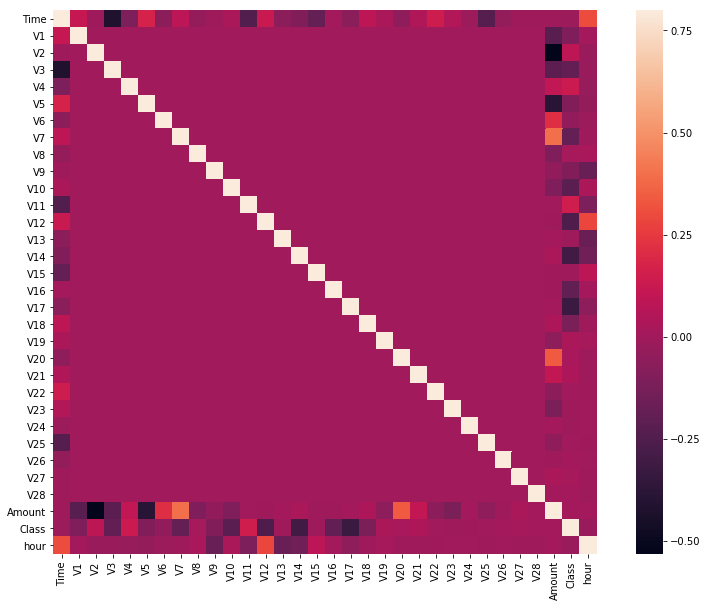

In [48]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)

unbalance

In [55]:
import pandas as pd
import pandas_profiling

In [56]:
profile = data.profile_report(title='credit fradu detector')
profile.to_file('path')


AttributeError: 'DataFrame' object has no attribute 'profile_report'

### EDA

1. data skewed
2. 0.17% unbalance
3. no missing data
4. time amount
5. v1 ~ v28 pca

## data cleaning

0.4:0.6 0.:0.5

## Unbalance--Label

- collect more data
- using weight
- chage metric
- sampling

# HOMEWORK - RUNKUN XIE

# HW 2.1 - fill out metric

## metric

In [60]:
# ture positive
def get_TP(y_true, y_pred):
    return sum((y_true==1)&(y_pred==1))

def get_FP(y_true, y_pred):
    return sum((y_true==0)&(y_pred==1))

def get_FN():
    return sum((y_true==1)&(y_pred==0))

def get_TN():
    return sum((y_true==0)&(y_pred==0))
    
# fp
# fn
# tn

In [61]:
def confusion_matrix(y_true, y_pred):
    TP = get_TP(y_true, y_pred)
    FN = get_FN(y_true, y_pred)
    FP = get_FP(y_true, y_pred)
    TN = get_TN(y_true, y_pred)
    return np.array([[TN, FP],[FN, TP]])

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label, pred)

NameError: name 'label' is not defined

regular machine leraning
多分类——>二分类

### accuracy

(TP+TN)/total

99 负样本
1 正样本

predict 100 负样本
acc = 99%

In [70]:
def accuracy(y_true, y_pred):
    
    TP = get_TP(y_true, y_pred)
    FN = get_FN(y_true, y_pred)
    FP = get_FP(y_true, y_pred)
    TN = get_TN(y_true, y_pred)
    
    return (TP + TN) / len(y_true) 

### precision

50 预测正
40 正确 
40/50

In [71]:
def precision(y_true, y_pred):
    
    TP = get_TP(y_true, y_pred)
    FN = get_FN(y_true, y_pred)
    FP = get_FP(y_true, y_pred)
    TN = get_TN(y_true, y_pred)
    
    return TP / (TP + FP)

### recall

99 负样本
1 正样本

predict 100 负样本

0/1 = 0

In [72]:
def precision(y_true, y_pred):
    
    TP = get_TP(y_true, y_pred)
    FN = get_FN(y_true, y_pred)
    FP = get_FP(y_true, y_pred)
    TN = get_TN(y_true, y_pred)
    
    return TP / (TP + FN)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

$y=kx+e$


model predict probility: 
  
1: 0.2
2: 0.4
3: 0.5
4. 0.1
5. 0.8
6  0.9

threshold <0.5
1: 0.2  - 0
2: 0.4  - 0
3: 0.5  - 1
4. 0.1  - 0
5. 0.8  - 1
6  0.9  - 1

threshold <0.2
1: 0.2  - 1
2: 0.4  - 1
3: 0.5  - 1
4. 0.1  - 0
5. 0.8  - 1
6  0.9  - 1

f1-score
1 : 10
0.2

 0 0 1 0 1

## sampling

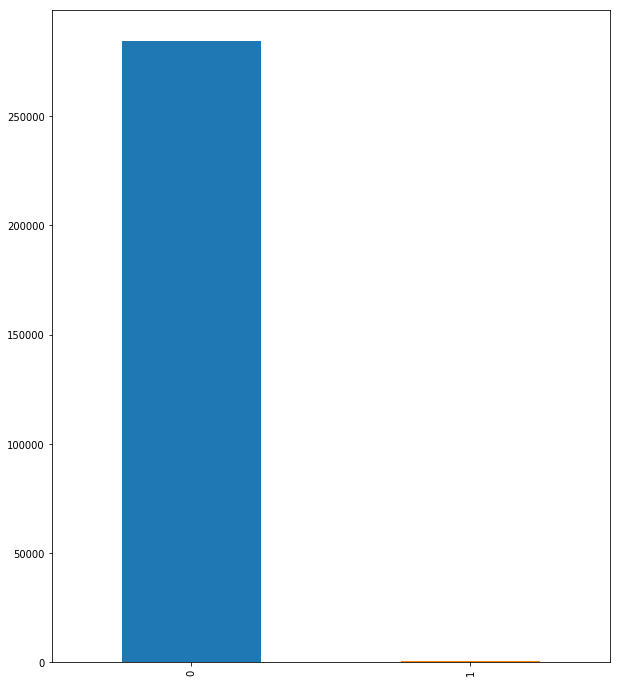

In [65]:
data['Class'].value_counts().plot('bar')

1 100  1000
0 1000 1000

100000
99000

10
1

In [73]:
from sklearn.linear_model import LogisticRegression

In [191]:
LogisticRegression(class_weight='balanced')
LogisticRegression(class_weight={0:1,1:100})

LogisticRegression(C=1.0, class_weight={0: 1, 1: 100}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [75]:
weights= list([1,1,1,1,2,1,2,3,1,1])

正负样本 1:1 4:6

differnt weights  plot metric

# HW 2.2 - differnt weights plot metric

# grid search over class_weight

In [130]:
x = np.column_stack((data.iloc[:,1:30], data.iloc[:,31]))
y_true = data['Class']

In [135]:
[{0: w/(1+w), 1:1/(1+w)} for w in np.arange(0.05, 1.05, 0.5)]

[{0: 0.047619047619047616, 1: 0.9523809523809523},
 {0: 0.3548387096774194, 1: 0.6451612903225806}]

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import ShuffleSplit

estimator = LogisticRegression()
parameters = {'class_weight':[{0:1-w, 1:w} for w in np.arange(0.05, 1.05, 0.1)]}


## Shuffle Split w. train:test = 0.7:0.3

In [183]:
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

In [184]:
clf = GridSearchCV(estimator, parameters, scoring = 'f1', cv=cv)
clf.fit(x, y_true)

/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vincentxie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [{0: 0.95, 1: 0.05}, {0: 0.85, 1: 0.15000000000000002}, {0: 0.75, 1: 0.25000000000000006}, {0: 0.6499999999999999, 1: 0.35000000000000003}, {0: 0.5499999999999999, 1: 0.45000000000000007}, {0: 0.44999999999999984, 1: 0.5500000000000002}, {0: 0.34999999999999987, 1: 0.6500000000000001}, {0: 0.24999999999999978, 1: 0.7500000000000002}, {0: 0.1499999999999998, 1: 0.8500000000000002}, {0: 0.04999999999999982, 1: 0.9500000000000002}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [185]:
clf.cv_results_['std_test_score']

array([0.18418426, 0.14994261, 0.13378281, 0.10372356, 0.08193309,
       0.06857503, 0.07822217, 0.07200487, 0.06090228, 0.09948041])

Text(0, 0.5, 'F1 Score')

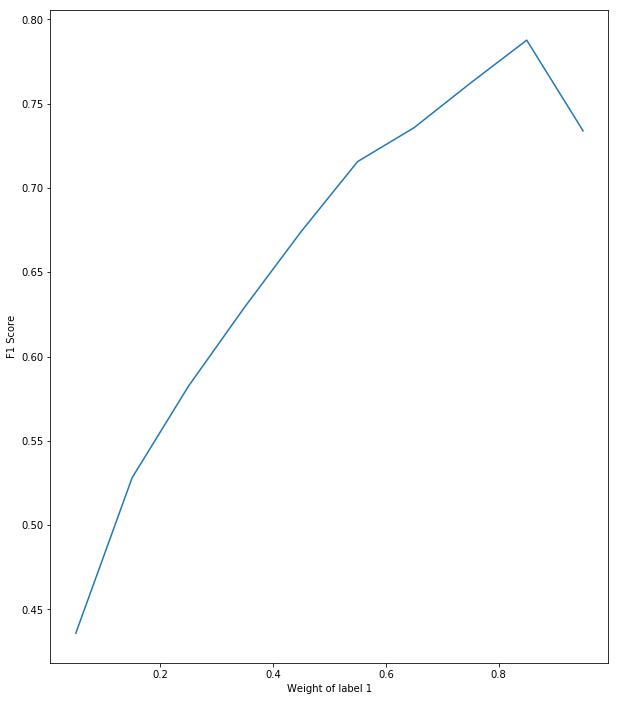

In [190]:
plt.plot(np.arange(0.05, 1.05, 0.1), clf.cv_results_['mean_test_score'])
plt.xlabel('Weight of label 1')
plt.ylabel('F1 Score')

## K-fold split w. n_fold = 5

In [ ]:
cv = 5

clf = GridSearchCV(estimator, parameters, scoring = 'f1', cv=cv)
clf.fit(x, y_true)

plt.plot(np.arange(0.05, 1.05, 0.1), clf.cv_results_['mean_test_score'])
plt.xlabel('Weight of label 1')
plt.ylabel('F1 Score')